This notebook contains figures and code to generate the figures, along with pointers the scripts used to generate the data for the figures<br>
More detailed graphing notebooks are param_plot_corrs and indep_plot_corrs<br>
Experimental/test notebooks are in /scripts/experimental

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Random vs LD Pruned

generating ld pruned: indep_ldprune.ipynb (test) and indep_ldprune.r (final)
<br>
generating random: indep_random.r
<br>
plots: indep_plot_corrs.ipynb

In [3]:
comparedf = pd.read_csv('../data/indep_compare_final.csv')
comparedf.head()

,phenotype,pearson_corr,prune_method,axis
0,phenotype1,0.273625,ldprune,prune_method
1,phenotype1,0.320360,ldprune,prune_method
2,phenotype1,0.312023,ldprune,prune_method
3,phenotype1,0.273269,ldprune,prune_method
4,phenotype1,0.298620,ldprune,prune_method


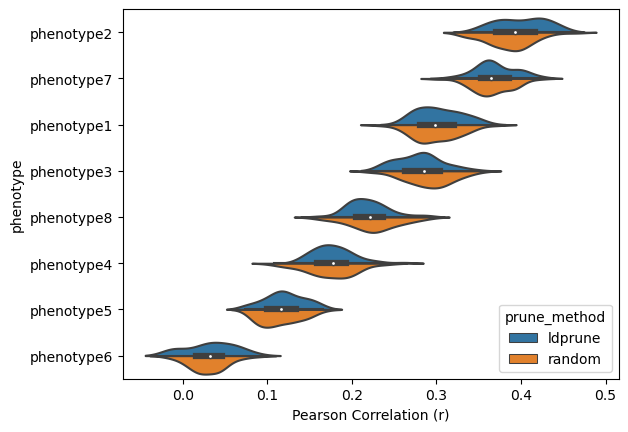

In [4]:
ax = sns.violinplot(data=comparedf.sort_values(by=['pearson_corr'], ascending=False), y='phenotype', x="pearson_corr", hue='prune_method', hue_order=['ldprune', 'random'], split=True, orient = 'h')
# plt.xticks(rotation=55)
plt.xlabel("Pearson Correlation (r)")
plt.show()

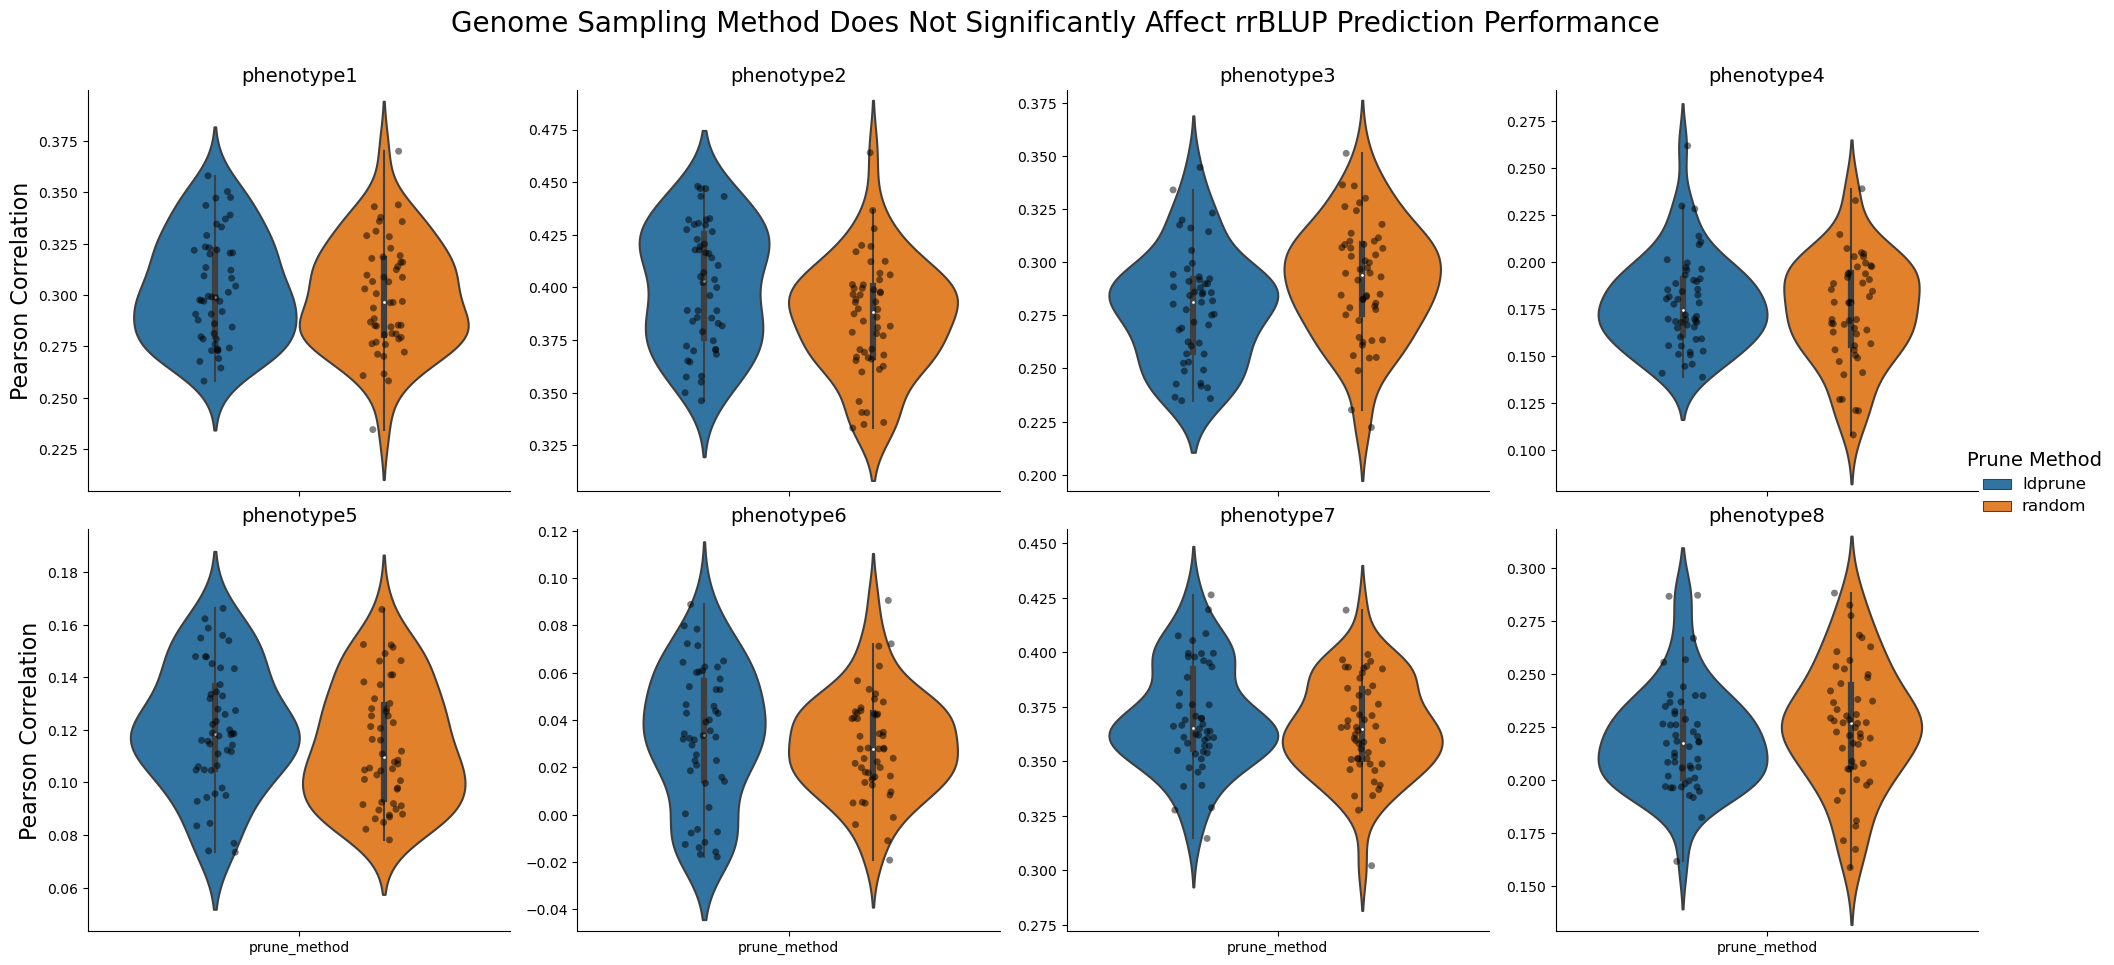

In [5]:
g = sns.catplot(data=comparedf[comparedf.prune_method != 'clump'], kind='violin', x='axis', y='pearson_corr', col='phenotype', hue='prune_method', sharey=False, col_wrap=4)

for i, ax in enumerate(g.axes.flat):
    category = ax.get_title().split(" = ")[1]
    category_data = comparedf[comparedf['phenotype'] == category]
    
    # Overlay stripplot on violinplot
    sns.stripplot(data=category_data[category_data.prune_method != 'clump'], x='axis', y='pearson_corr', hue='prune_method', dodge=True, alpha=0.5, jitter=True, ax=ax, legend=False, palette = ['black', 'black'])
    
    ymin, ymax = category_data['pearson_corr'].min(), category_data['pearson_corr'].max()
    ax.set_ylim(ymin-0.03, ymax+0.03)
    ax.set_title(category, fontsize=14)
    
    if i % 4 == 0: ax.set_ylabel("Pearson Correlation", fontsize=16)
    else: ax.set_ylabel("")
    ax.set_xlabel("")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Genome Sampling Method Does Not Significantly Affect rrBLUP Prediction Performance', fontsize=20)

legend = g._legend
legend.set_title("Prune Method", prop={'size': 14})

for label in legend.get_texts():
    label.set_fontsize(12)

plt.show()

## Random #SNPs

random_gen.r (final) and fully_random_gens.ipynb (not up to date)
<br>
full_pred_pipeline.r runs for predictions w/o subsampling snps
<br>
plots: param_plot_corrs.ipynb

In [9]:
rlog = pd.read_csv('../data/randomlogtest.csv')
rlog['r2'] = rlog.pearson_corr ** 2
rlog.head()

,num_snps,phenotype,pearson_corr,r2
0,10,phenotype1,0.053849,0.002900
1,10,phenotype2,-0.023852,0.000569
2,10,phenotype1,-0.024123,0.000582
3,10,phenotype8,0.040918,0.001674
4,10,phenotype7,0.044580,0.001987


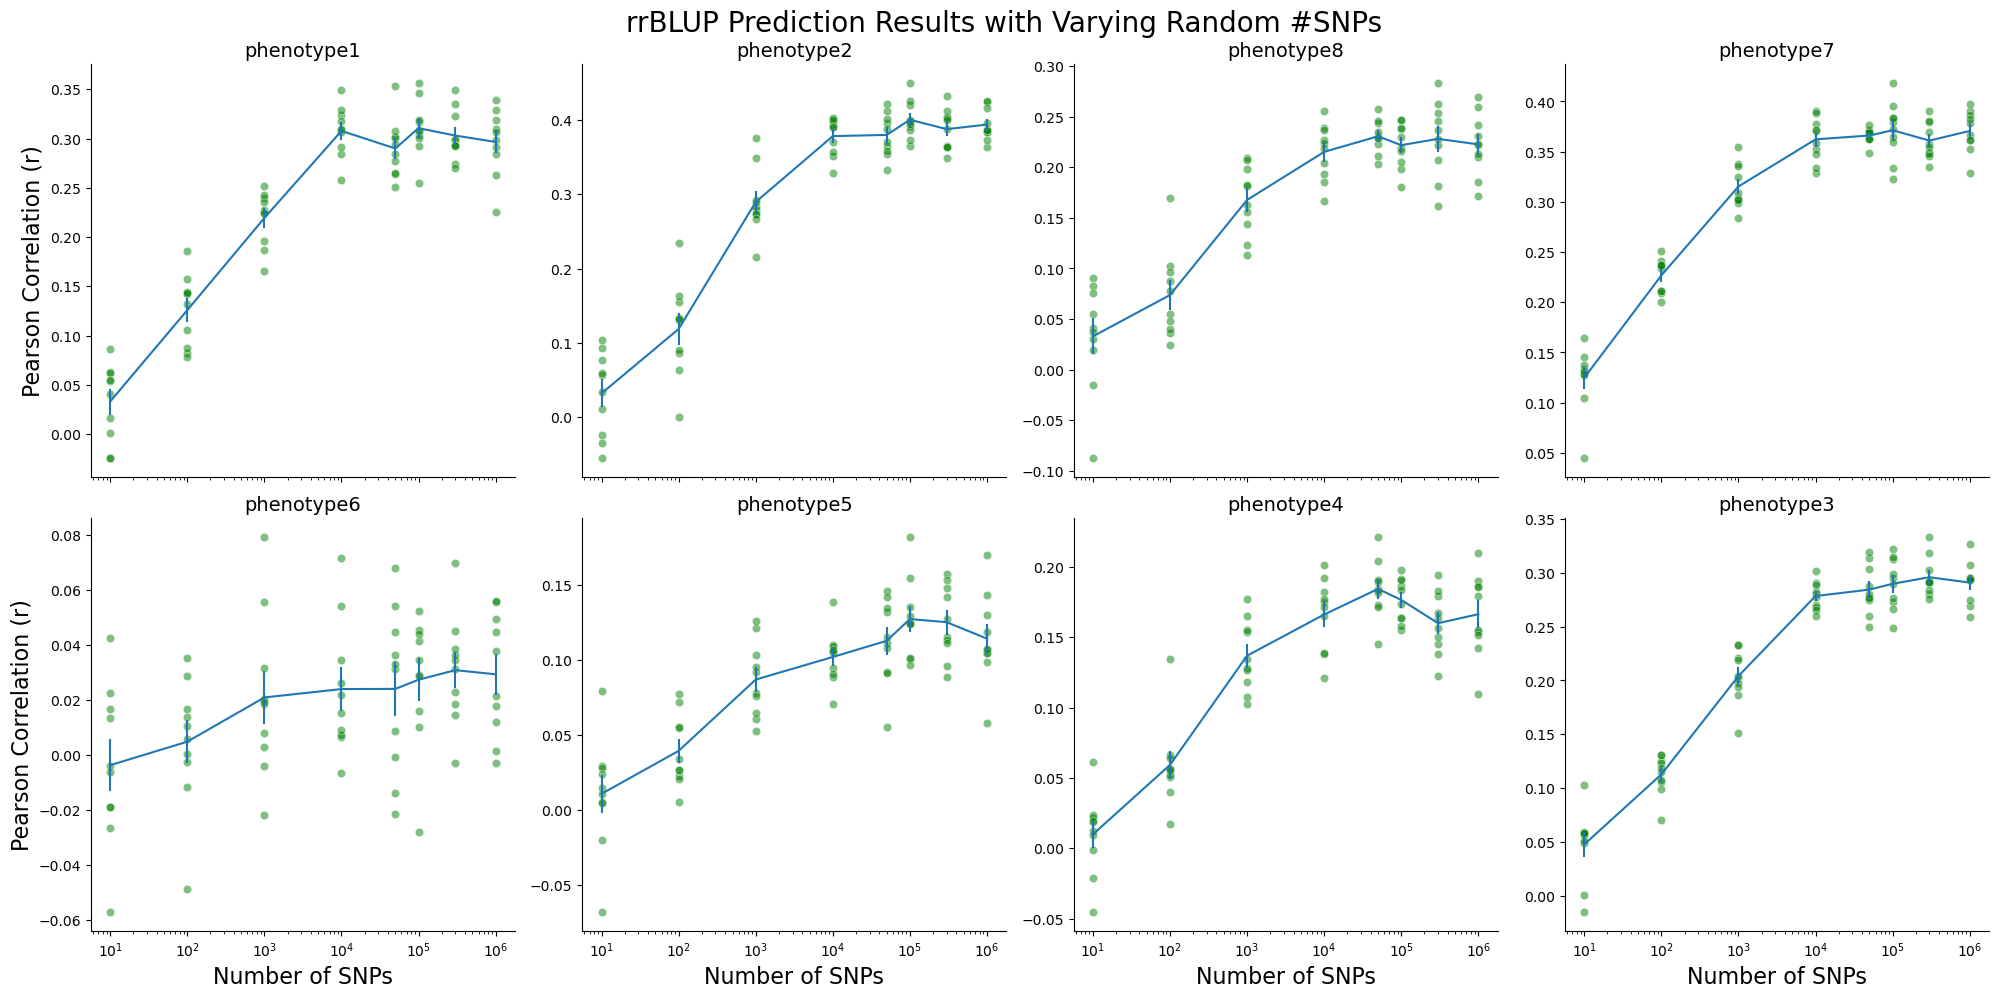

In [10]:
g = sns.relplot(data=rlog, x='num_snps', y='pearson_corr', kind='line', col='phenotype', err_style="bars", errorbar="se", markers=False, dashes=False, col_wrap=4, facet_kws={'sharey': False})
# Plot scatterplot for each category separately
def plot_scatter(x, y, color, **kwargs):
    data = kwargs.pop('data')
    category = data['phenotype'].unique()[0]
    category_data = data[data['phenotype'] == category]
    sns.scatterplot(data=category_data, x=x, y=y, color=color, **kwargs)
    
for i, ax in enumerate(g.axes.flat):
    category = ax.get_title().split(" = ")[1]
    ax.set_title(category, fontsize=14)

g.map(plot_scatter, 'num_snps', 'pearson_corr', color='green', alpha=0.5, data=rlog)
plt.xscale('log')
g.fig.subplots_adjust(top=0.925)
g.fig.suptitle('rrBLUP Prediction Results with Varying Random #SNPs', fontsize=20)
g.set_axis_labels(x_var="Number of SNPs", y_var="Pearson Correlation (r)", fontsize=16)
plt.show()

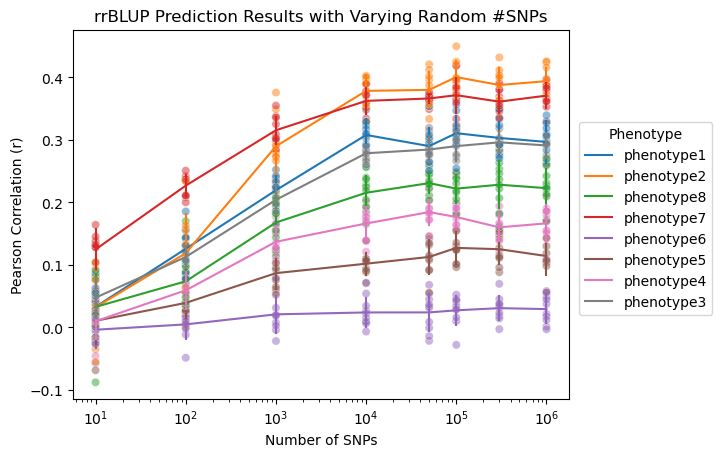

In [12]:
sns.lineplot(data=rlog, x='num_snps', y='pearson_corr', err_style="bars", errorbar="sd", markers=False, dashes=False, hue='phenotype')
sns.scatterplot(data=rlog, x='num_snps', y='pearson_corr', alpha=0.5, hue='phenotype', legend=False)
plt.xlabel('Number of SNPs')
plt.ylabel('Pearson Correlation (r)')
plt.title("rrBLUP Prediction Results with Varying Random #SNPs")
plt.legend(title='Phenotype', bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)
plt.xscale('log')

## Changing #Rats

var_sample_size.ipynb (test) and var_sample_size.r (final)
<br>
plots: indep_plot_corrs.ipynb

In [13]:
train_full = pd.read_csv('../data/sample_size_final.csv')
train_full.head()

,phenotype,num_train_rats,pearson_corr,r2
0,phenotype1,10,0.166729,0.027799
1,phenotype1,10,-0.027668,0.000765
2,phenotype1,10,-0.014902,0.000222
3,phenotype1,10,0.115968,0.013449
4,phenotype1,10,0.148317,0.021998


Text(0.5, 1.0, 'rrBLUP Prediction Results with Varying Sample Size')

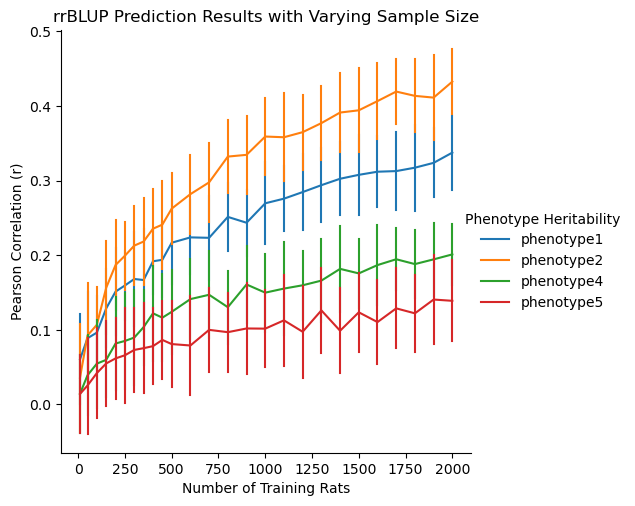

In [14]:
g = sns.relplot(data=train_full,  kind='line', x='num_train_rats', y='pearson_corr', hue='phenotype', err_style="bars", errorbar="sd", markers=False, dashes=False)
g._legend.set_title('Phenotype Heritability')
sns.move_legend(g, "center left", bbox_to_anchor=(.75, .5))
plt.xlabel('Number of Training Rats')
plt.ylabel('Pearson Correlation (r)')
plt.title("rrBLUP Prediction Results with Varying Sample Size")

Text(0.5, 1.0, 'rrBLUP Prediction Results with Varying Sample Size')

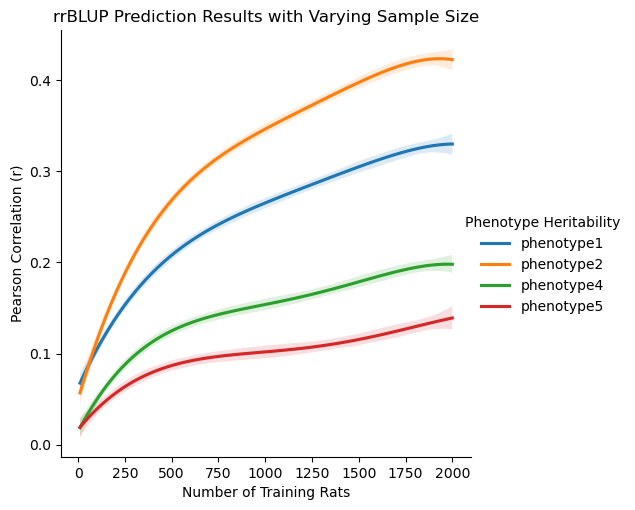

In [15]:
g = sns.lmplot(data=train_full, x='num_train_rats', y='pearson_corr', hue='phenotype', order=4, ci=95, scatter=False)
g._legend.set_title('Phenotype Heritability')
sns.move_legend(g, "center left", bbox_to_anchor=(.75, .5))
plt.xlabel('Number of Training Rats')
plt.ylabel('Pearson Correlation (r)')
plt.title("rrBLUP Prediction Results with Varying Sample Size")

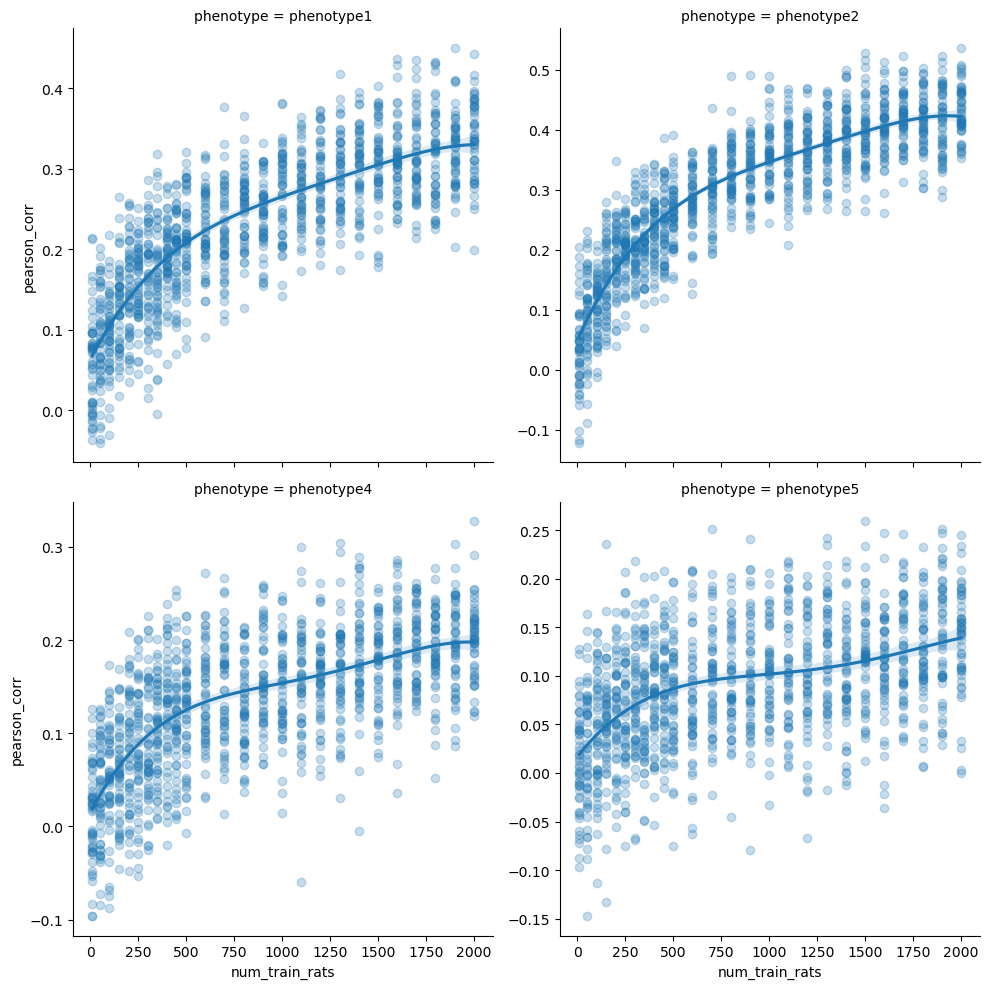

In [16]:
g = sns.lmplot(data=train_full, x='num_train_rats', y='pearson_corr', col='phenotype', col_wrap=2, order=4, x_ci='sd', scatter_kws={'alpha':0.25}, facet_kws={'sharey': False})

## Pruning Parameters
param_tuning_indep_ldprune.r (final) and window_ld_prune.ipynb (test) (sort of, not all of the code is for this, some is old window parameter experiments)
<br>
plots: param_plot_corrs.ipynb

In [18]:
indepld = pd.read_csv('../data/window_indep_ldprune.csv')
indepld.head()

,window_size,pairwise_r2,num_snps,pearson_corr,phenotype
0,50,0.5,211505,0.373289,phenotype2
1,50,0.5,211675,0.422237,phenotype2
2,50,0.5,211470,0.381061,phenotype2
3,50,0.5,211866,0.389467,phenotype2
4,50,0.5,211672,0.415936,phenotype2


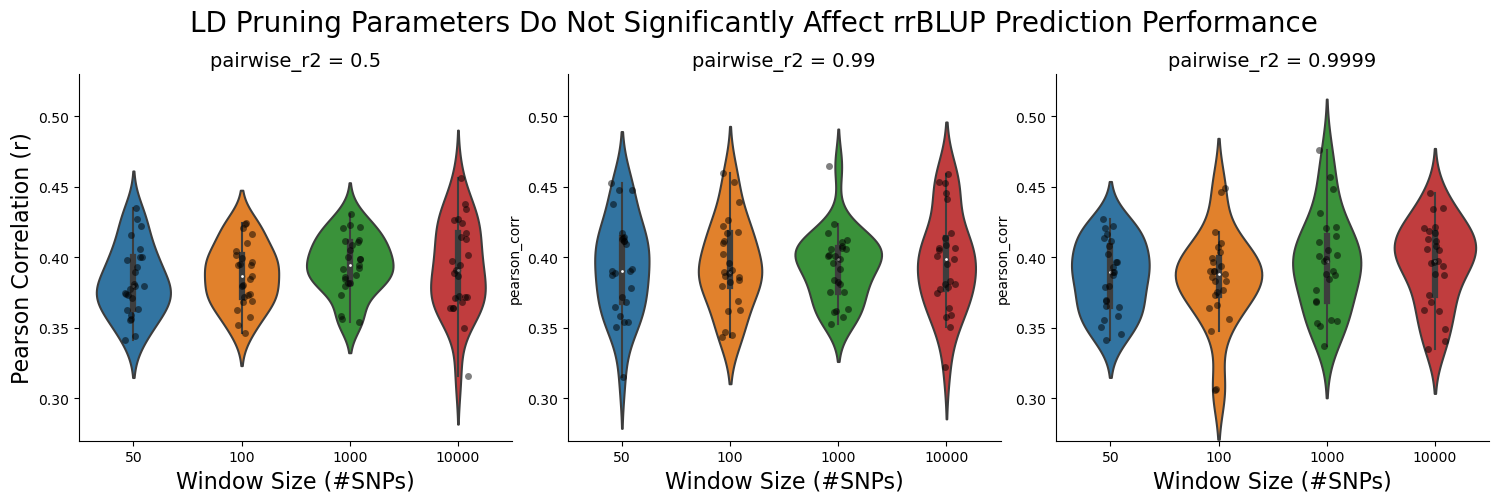

In [21]:
g = sns.catplot(data=indepld[indepld.phenotype=='phenotype2'], kind='violin', x="window_size", y="pearson_corr", col='pairwise_r2', facet_kws={'sharey': False, 'sharex': False}, sharey=False, alpha=0.5)
g.fig.suptitle('LD Pruning Parameters Do Not Significantly Affect rrBLUP Prediction Performance', fontsize=20)
g.fig.subplots_adjust(top=0.85)
g.set_axis_labels('Window Size (#SNPs)', "Pearson Correlation (r)", fontsize=16)

for i, ax in enumerate(g.axes.flat):
    r2 = ax.get_title().split('=')[1]
    ax.set_title(label=ax.get_title(), fontsize=14)

    category_data = indepld[(indepld['phenotype'] == 'phenotype2') & (indepld['pairwise_r2'] == float(r2))]    
    
    # Overlay stripplot on violinplot
    sns.stripplot(data=category_data, x='window_size', y='pearson_corr', dodge=True, alpha=0.5, jitter=True, ax=ax, legend=False, color='black')
    
    ymin, ymax = category_data['pearson_corr'].min(), category_data['pearson_corr'].max()
    ax.set_ylim(0.27, 0.53)

plt.show()

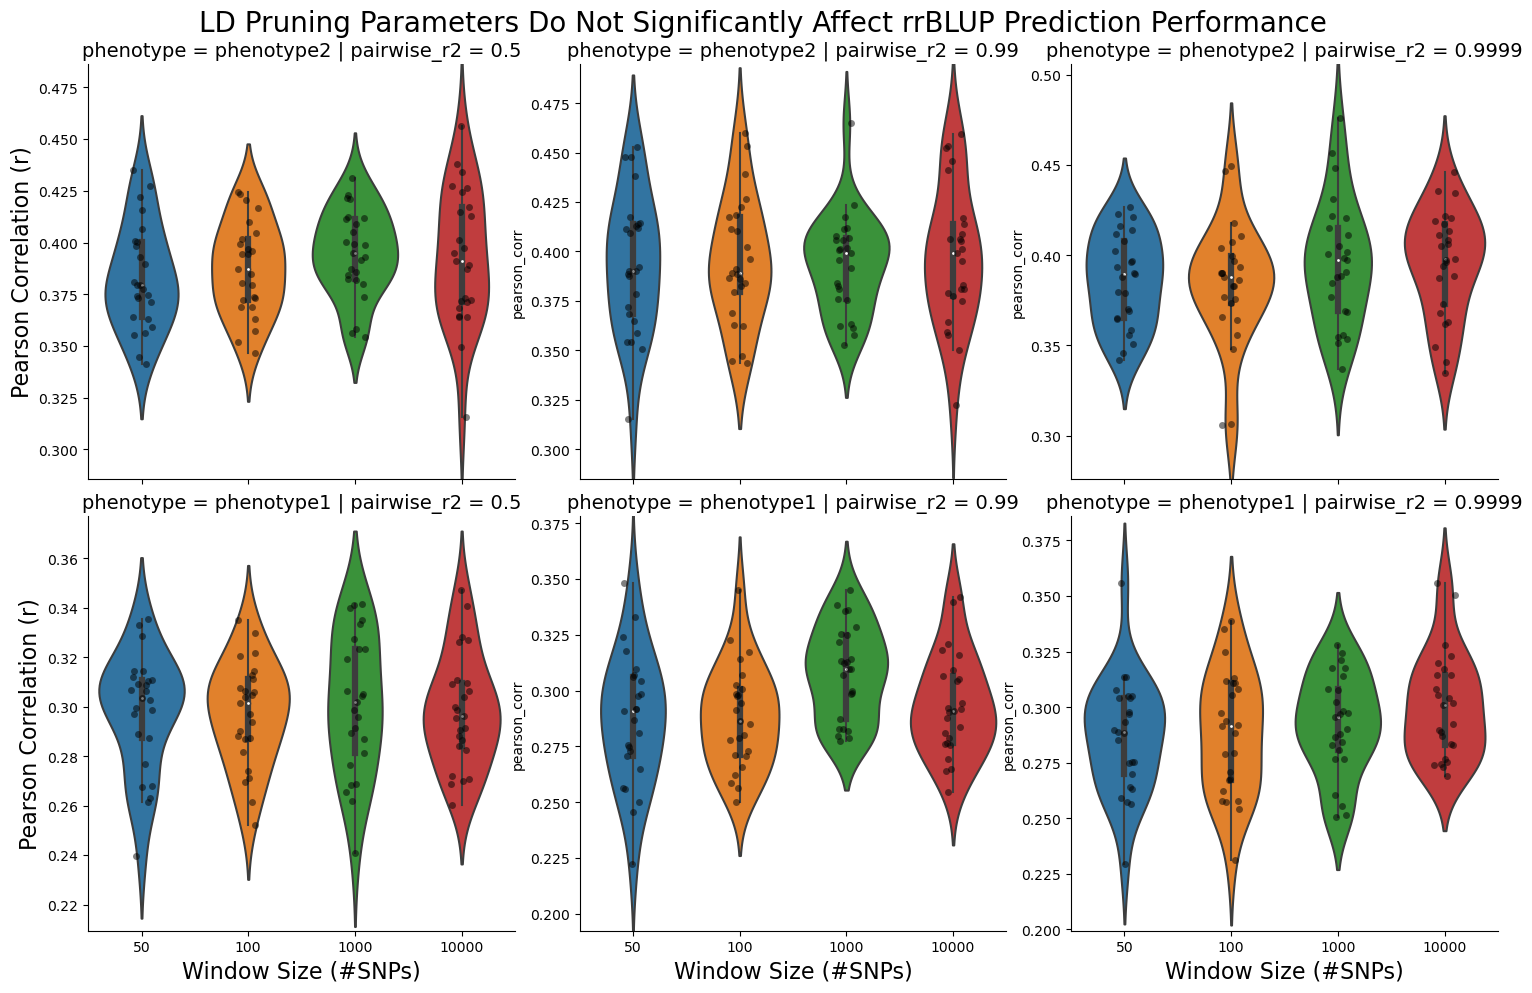

In [22]:
g = sns.catplot(data=indepld, kind='violin', x="window_size", y="pearson_corr", row='phenotype', col='pairwise_r2', facet_kws={'sharey': False, 'sharex': False}, sharey=False, alpha=0.5)
g.fig.suptitle('LD Pruning Parameters Do Not Significantly Affect rrBLUP Prediction Performance', fontsize=20)
g.fig.subplots_adjust(top=0.925)
g.set_axis_labels('Window Size (#SNPs)', "Pearson Correlation (r)", fontsize=16)

for i, ax in enumerate(g.axes.flat):
    pheno = ax.get_title().split('|')[0].split('=')[1].strip()
    r2 = ax.get_title().split('|')[1].split('=')[1]
    ax.set_title(label=ax.get_title(), fontsize=14)

    category_data = indepld[(indepld['phenotype'] == pheno) & (indepld['pairwise_r2'] == float(r2))]    
    
    # Overlay stripplot on violinplot
    sns.stripplot(data=category_data, x='window_size', y='pearson_corr', dodge=True, alpha=0.5, jitter=True, ax=ax, legend=False, color='black')
    
    ymin, ymax = category_data['pearson_corr'].min(), category_data['pearson_corr'].max()
    ax.set_ylim(ymin-0.03, ymax+0.03)

plt.show()

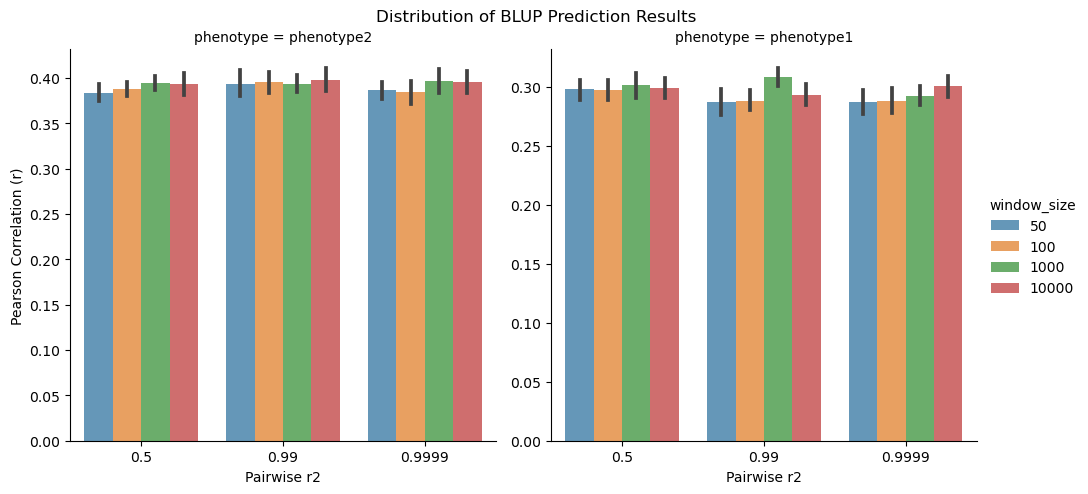

In [23]:
g = sns.catplot(data=indepld, kind='bar', x="pairwise_r2", hue= 'window_size', y="pearson_corr", col = 'phenotype', facet_kws={'sharey': False, 'sharex': False}, sharey=False, alpha=0.75)
g.fig.suptitle('Distribution of BLUP Prediction Results')
g.fig.subplots_adjust(top=0.90)
g.set_axis_labels('Pairwise r2', "Pearson Correlation (r)")

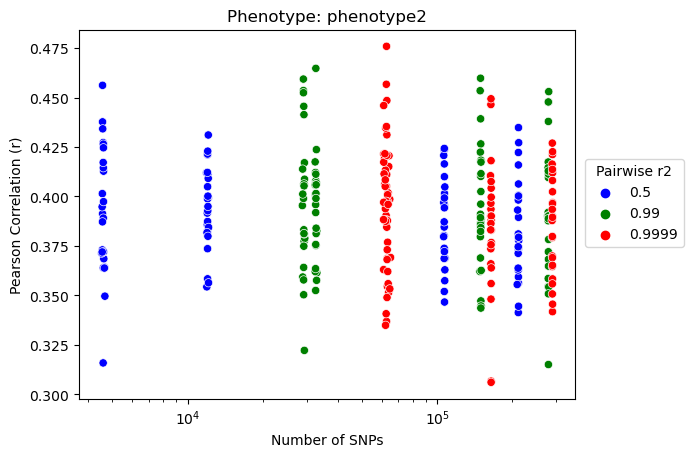

In [25]:
ax = sns.scatterplot(data=indepld[indepld.phenotype=='phenotype2'], x='num_snps', hue='pairwise_r2', y='pearson_corr', palette = ['blue', 'green', 'red'])
plt.xscale('log')
plt.ylabel('Pearson Correlation (r)')
plt.xlabel('Number of SNPs')
plt.title('Phenotype: phenotype2')
plt.legend(title='Pairwise r2', bbox_to_anchor=(1.02, 0.65), loc='upper left', borderaxespad=0)

## rrBLUP vs sklearn
sklearn is in /ld_prune/thiago/ instead of /ld_prune/scripts
<br>
main file is elastic_net_preds.ipynb

In [30]:
comp = pd.read_csv('../thiago/comparison.txt', sep='\t')
comp = pd.melt(comp, id_vars=['clf']).rename(columns={'clf': 'Model', 'variable': 'Subset', 'value': 'r2'})

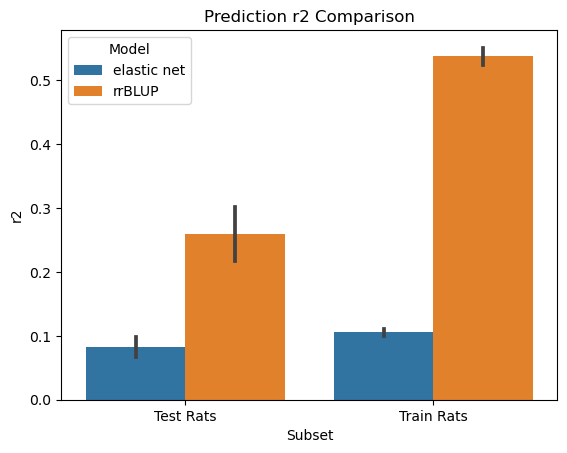

In [31]:
ax = sns.barplot(data=comp[comp.Subset != 'all_r2'], x='Subset', y='r2', hue='Model', errorbar='sd')
plt.title('Prediction r2 Comparison')
ax.set_xticklabels(['Test Rats', 'Train Rats'])
plt.show()

## Runtimes
plot_runtimes_py.ipynb and plot_runtimes_r.ipynb (in old/)

In [32]:
A = pd.read_csv("../data/Amat_runtimes_final.csv")
A.r2_out = A.r2_out.astype('str')
A.head()

,r2_out,window_out,times,num_snps
0,0.5,100,164.845985,98666
1,0.5,1000,52.866741,16977
2,0.5,10000,42.249561,10184
3,0.5,100000,42.875504,10167
4,0.99,100,223.400352,137041


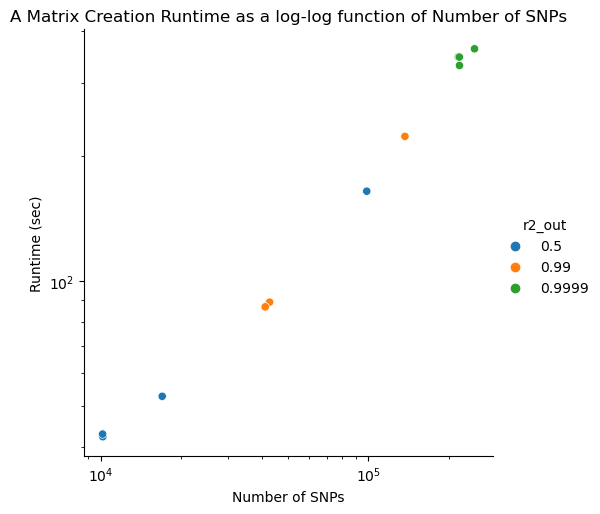

In [33]:
sns.relplot(data=A, x='num_snps', y='times', hue='r2_out')
plt.title("A Matrix Creation Runtime as a log-log function of Number of SNPs")
plt.ylabel("Runtime (sec)")
plt.xlabel("Number of SNPs")
plt.xscale('log')
plt.yscale('log')

In [34]:
rand = pd.read_csv("../data/randomlogtime.csv")
rand.rename(columns={'out_snps': "num_snps", "rprunert": 'random_pruning_runtime', 'Amatrt':"A_matrix_runtime", 'predsrt': 'blup_pred_runtime'}, inplace=True)
rand = rand.groupby('outsnps').median().reset_index()
rand.set_index('outsnps', inplace=True)
rand.head()

,random_pruning_runtime,A_matrix_runtime,blup_pred_runtime
outsnps,,,
10,1.968108,0.979991,4.231843
100,4.360780,1.008110,14.578517
1000,13.364308,2.996944,8.230070
10000,4.292520,19.409941,5.873103
50000,8.508364,79.888435,5.621571


Text(0, 0.5, 'Runtime (seconds)')

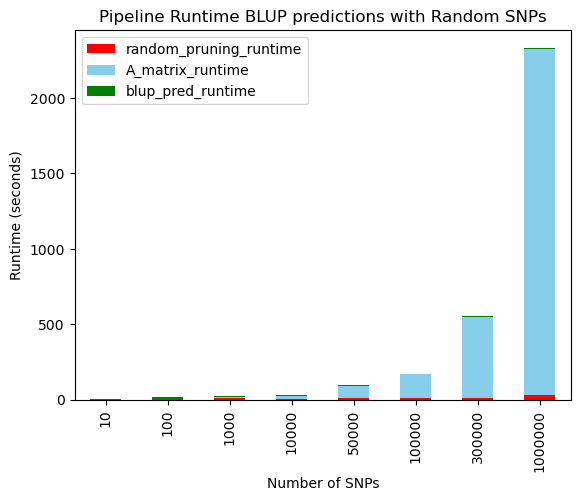

In [35]:
# this is with 1 core 24 ppn I think
rand.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.title("Pipeline Runtime BLUP predictions with Random SNPs")
plt.xlabel("Number of SNPs")
plt.ylabel("Runtime (seconds)")